Raw Data:
            Coffee_Sales
Date                    
2025-02-01          20.0
2025-02-02          22.0
2025-02-03          19.0
2025-02-04          25.0
2025-02-05          30.0
2025-02-06          35.0
2025-02-07          28.0
2025-02-08          21.0
2025-02-09          23.0
2025-02-10          20.0
2025-02-11          26.0
2025-02-12          32.0
2025-02-13          38.0
2025-02-14           NaN


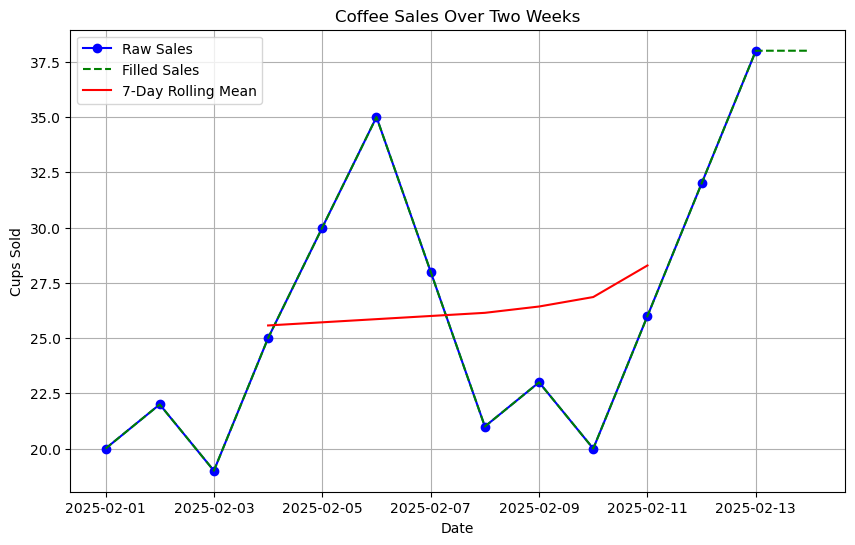


Basic Stats:
       Coffee_Sales  Coffee_Sales_Filled  Rolling_Mean
count     13.000000            14.000000      8.000000
mean      26.076923            26.928571     26.357143
std        6.143581             6.707794      0.880631
min       19.000000            19.000000     25.571429
25%       21.000000            21.250000     25.821429
50%       25.000000            25.500000     26.071429
75%       30.000000            31.500000     26.535714
max       38.000000            38.000000     28.285714


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a simple time series dataset: coffee sales over 14 days
dates = pd.date_range(start='2025-02-01', end='2025-02-14', freq='D')  # 2 weeks in Feb 2025
sales = [20, 22, 19, 25, 30, 35, 28, 21, 23, 20, 26, 32, 38, np.nan]  # Sales with 1 missing value

# Put it in a DataFrame (like a table)
data = pd.DataFrame({'Date': dates, 'Coffee_Sales': sales})
data.set_index('Date', inplace=True)  # Use dates as the index

# Print the raw data
print("Raw Data:")
print(data)

# Handle missing value (interpolate)
data['Coffee_Sales_Filled'] = data['Coffee_Sales'].interpolate(method='linear')

# Calculate a 7-day rolling average to smooth noise
data['Rolling_Mean'] = data['Coffee_Sales_Filled'].rolling(window=7, center=True).mean()

# Plot everything
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(data.index, data['Coffee_Sales'], label='Raw Sales', marker='o', color='blue')  # Raw data with dots
plt.plot(data.index, data['Coffee_Sales_Filled'], label='Filled Sales', linestyle='--', color='green')  # Interpolated
plt.plot(data.index, data['Rolling_Mean'], label='7-Day Rolling Mean', color='red')  # Smoothed trend
plt.title('Coffee Sales Over Two Weeks')
plt.xlabel('Date')
plt.ylabel('Cups Sold')
plt.legend()
plt.grid(True)
plt.show()

# Basic stats to check patterns
print("\nBasic Stats:")
print(data.describe())

In [1]:
import pandas as pd

## Timedelta Object

#### Represents a duration , the difference between two dates or times

In [4]:
t1 = pd.Timestamp('6th Jan 2023 9:23:12')
t2 = pd.Timestamp('26th Jan 2023 21:23:15')
t2-t1

Timedelta('20 days 12:00:03')

In [5]:
pd.Timedelta(days=2,hours=10,minutes=30,seconds=15)

Timedelta('2 days 10:30:15')

In [6]:
pd.Timestamp('6th Jan 2025') +pd.Timedelta(days=2,hours=10,minutes=30,seconds=15)


Timestamp('2025-01-08 10:30:15')

-------------------------------------------------------------------------------------------------------------------------

In [9]:
df = pd.read_csv("GOOGL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [11]:
df["Date"] = pd.to_datetime(df["Date"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4431 non-null   datetime64[ns]
 1   Open       4431 non-null   float64       
 2   High       4431 non-null   float64       
 3   Low        4431 non-null   float64       
 4   Close      4431 non-null   float64       
 5   Adj Close  4431 non-null   float64       
 6   Volume     4431 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 242.4 KB


In [13]:
df.set_index("Date",inplace=True)

In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [17]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


In [18]:
# fetch a specific date
df.loc['2022-03-24']

Open         2.784000e+03
High         2.832380e+03
Low          2.755010e+03
Close        2.831440e+03
Adj Close    2.831440e+03
Volume       1.317900e+06
Name: 2022-03-24 00:00:00, dtype: float64

In [43]:
df["Month name"] = df.index.month_name()

In [44]:
df["Day name"] = df.index.day_name()

In [47]:
df["quarter"] = df.index.quarter

In [48]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Month name,Day name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3


In [50]:
# slicing
df.loc["2004-08-19":"2004-10-12"]
# in loc first and last is included

,Open,High,Low,Close,Adj Close,Volume,Month name,Day name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3
2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094898,August,Thursday,3
2004-08-27,54.104103,54.364365,52.897900,53.128128,53.128128,6211782,August,Friday,3
2004-08-30,52.692692,52.797798,51.056057,51.056057,51.056057,5196798,August,Monday,3
2004-08-31,51.201202,51.906906,51.131130,51.236237,51.236237,4917877,August,Tuesday,3


In [51]:
#  challenge --> fetch info for a particular date every year --> limitation of timedelta
pd.date_range(start="2005-1-6",end="2022-1-6",freq=pd.DateOffset(years=1))

DatetimeIndex(['2005-01-06', '2006-01-06', '2007-01-06', '2008-01-06',
               '2009-01-06', '2010-01-06', '2011-01-06', '2012-01-06',
               '2013-01-06', '2014-01-06', '2015-01-06', '2016-01-06',
               '2017-01-06', '2018-01-06', '2019-01-06', '2020-01-06',
               '2021-01-06', '2022-01-06'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [52]:
df[df.index.isin(pd.date_range(start="2005-1-6",end="2022-1-6",freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,Month name,Day name,quarter
Date,,,,,,,,,
2005-01-06,97.637634,98.048050,93.953957,94.369370,94.369370,20753426,January,Thursday,1
2006-01-06,228.663666,235.485489,226.846848,233.063065,233.063065,35478286,January,Friday,1
2009-01-06,166.656662,170.570572,163.358353,167.197205,167.197205,12837550,January,Tuesday,1
2010-01-06,313.243256,313.243256,303.483490,304.434448,304.434448,7949443,January,Wednesday,1
2011-01-06,305.645660,309.524536,305.330322,307.057068,307.057068,4111484,January,Thursday,1
2012-01-06,329.904907,330.330322,325.220215,325.335327,325.335327,5380414,January,Friday,1
2014-01-06,557.062073,559.989990,553.773804,559.219238,559.219238,3535061,January,Monday,1
2015-01-06,520.500000,521.210022,505.549988,506.640015,506.640015,2722800,January,Tuesday,1
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300,January,Wednesday,1


<Axes: xlabel='Date'>

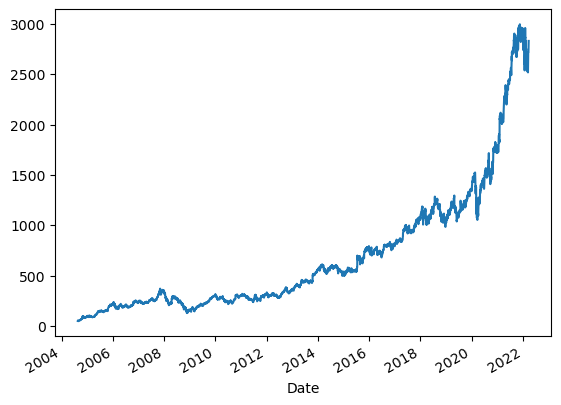

In [53]:
df["Close"].plot()

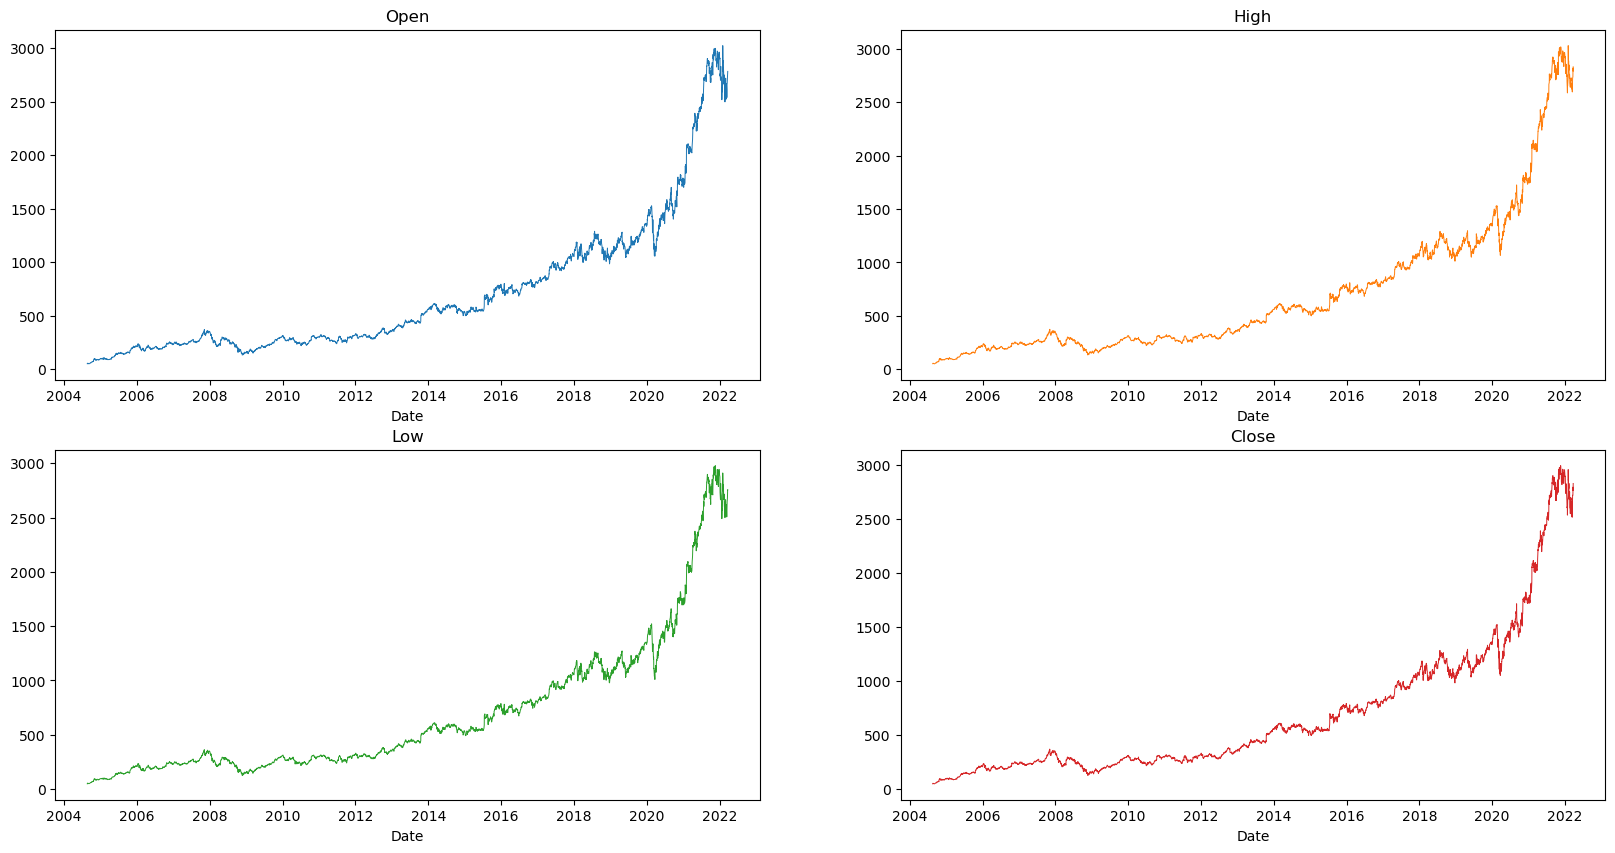

In [56]:
df_1 = df[['Open','High','Low','Close']]
ax = df_1.plot(
        subplots=True,
        layout=(2,2),
        sharex=False,
        sharey=False,
        linewidth=0.7 ,
        fontsize=10,
        legend=False,
        figsize=(20,10),
        title = ['Open','High','Low','Close'])

<Axes: xlabel='Date'>

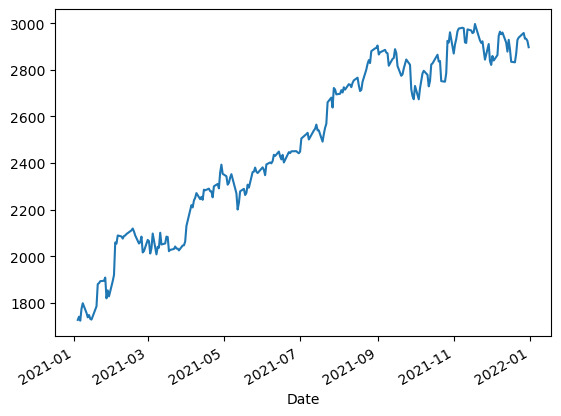

In [58]:
df.loc['2021']["Close"].plot()

In [60]:
df.asfreq("QE")

,Open,High,Low,Close,Adj Close,Volume,Month name,Day name,quarter
Date,,,,,,,,,
2004-09-30,65.015015,66.216217,64.564568,64.864868,64.864868,13758028.0,September,Thursday,3.0
2004-12-31,99.714714,100.040039,96.376373,96.491493,96.491493,15321663.0,December,Friday,4.0
2005-03-31,89.064064,90.785789,88.908913,90.345345,90.345345,13523663.0,March,Thursday,1.0
2005-06-30,147.317322,149.614609,145.665665,147.222229,147.222229,30158611.0,June,Thursday,2.0
2005-09-30,157.267273,158.908905,156.301300,158.388382,158.388382,18284297.0,September,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2020-12-31,1737.270020,1757.500000,1736.089966,1752.640015,1752.640015,1053500.0,December,Thursday,4.0
2021-03-31,2054.399902,2086.260010,2047.000000,2062.520020,2062.520020,2128500.0,March,Wednesday,1.0
2021-06-30,2439.889893,2445.139893,2427.090088,2441.790039,2441.790039,1223700.0,June,Wednesday,2.0


<Axes: xlabel='Date'>

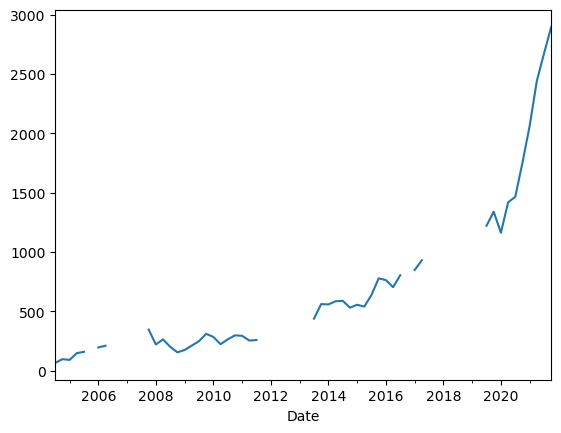

In [63]:
df["Close"].asfreq("QE").plot()

<Axes: xlabel='Month name'>

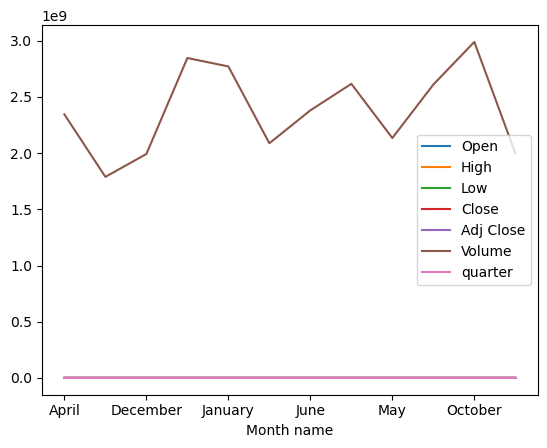

In [66]:
df.groupby("Month name").sum().plot()

<Axes: xlabel='Month name'>

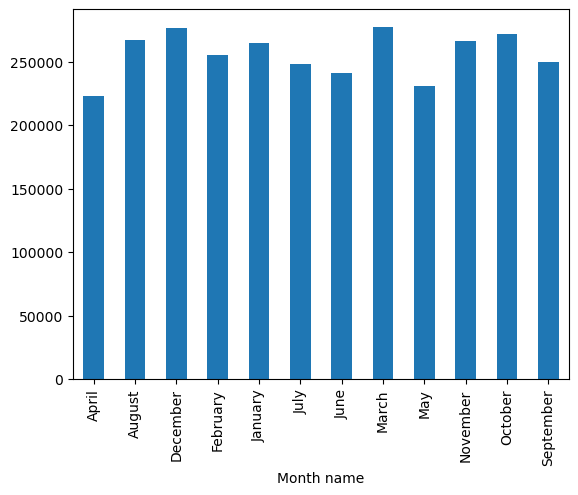

In [70]:
df.groupby("Month name")["Close"].sum().plot(kind="bar")

## Resampling
```js
Resampling involves changin the frequency of your time series observations.
There are two types of resampling:
    1. Upsampling : Where you increase the frequency of the samples , such as from minutes to seconds.
    2. Downsampling : Where you decrease the frequency of the samples , such as from days to months.
```